# Kaggle Project

## Describe Your Dataset

**URL:** https://www.kaggle.com/datasets/lantian773030/pokemonclassification

**Task:**

Classify 150 first-generation Pokémon Images


**Datasets**

* Train dataset: 7624 card Image, 224*224 3 channel

* Validation dataset: 265 Image, 224*224 3 channel

* Test dataset: 265 Image, 224*224 3 channel

**Features(x):**

Pictures of 150 first-generation Pokémon


**Target(y):**  

| Pokémon | Pokémon | Pokémon | Pokémon | Pokémon |
| ------ | ------- | ------ | ------- | ------ |
| Abra | Aerodactyl | Alakazam | Alolan Sandslash | Arbok |
| Arcanine | Articuno | Beedrill | Bellsprout | Blastoise |
| Bulbasaur | Butterfree | Caterpie | Chansey | Charizard |
| Charmander | Charmeleon | Clefable | Clefairy | Cloyster |
| Cubone | Dewgong | Diglett | Ditto | Dodrio |
| Doduo | Dragonair | Dragonite | Dratini | Drowzee |
| Dugtrio | Eevee | Ekans | Electabuzz | Electrode |
| Exeggcute | Exeggutor | Farfetchd | Fearow | Flareon |
| Gastly | Gengar | Geodude | Gloom | Golbat |
| Goldeen | Golduck | Golem | Graveler | Grimer |
| Growlithe | Gyarados | Haunter | Hitmonchan | Hitmonlee |
| Horsea | Hypno | Ivysaur | Jigglypuff | Jolteon |
| Jynx | Kabuto | Kabutops | Kadabra | Kakuna |
| Kangaskhan | Kingler | Koffing | Krabby | Lapras |
| Lickitung | Machamp | Machoke | Machop | Magikarp |
| Magmar | Magnemite | Magneton | Mankey | Marowak |
| Meowth | Metapod | Mew | Mewtwo | Moltres |
| MrMime | Muk | Nidoking | Nidoqueen | Nidorina |
| Nidorino | Ninetales | Oddish | Omanyte | Omastar |
| Onix | Paras | Parasect | Persian | Pidgeot |
| Pidgeotto | Pidgey | Pikachu | Pinsir | Poliwag |
| Poliwhirl | Poliwrath | Ponyta | Porygon | Primeape |
| Psyduck | Raichu | Rapidash | Raticate | Rattata |
| Rhydon | Rhyhorn | Sandshrew | Sandslash | Scyther |
| Seadra | Seaking | Seel | Shellder | Slowbro |
| Slowpoke | Snorlax | Spearow | Squirtle | Starmie |
| Staryu | Tangela | Tauros | Tentacool | Tentacruel |
| Vaporeon | Venomoth | Venonat | Venusaur | Victreebel |
| Vileplume | Voltorb | Vulpix | Wartortle | Weedle |
| Weepinbell | Weezing | Wigglytuff | Zapdos | Zubat |



---

## Build Your Model

### Data preprocessing

In [1]:
## codes
import os.path
import torch
import torch.nn as nn
import torch.nn.functional as F
from tqdm import tqdm
from torch import optim
from torch.utils.data import DataLoader as D
from torchvision.datasets import ImageFolder
from torchvision.transforms import transforms


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')  # use GPU or CPU
print('Using {} device'.format(device))

# dataset path
image_path = 'C:/Users/Miracle/OneDrive - dgu.ac.kr/Kaggle/PokemonData'
batch_size = 128  # batch size
torch.manual_seed(42)  #  set random seed to ensure the same split everytime

# data preprocessing
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # resize image
    transforms.CenterCrop(224),  # clip image from center
    transforms.RandomHorizontalFlip(),  # random horizontal flip
    transforms.RandomRotation(10),  # random rotation
    transforms.ToTensor(),  # transform to tensor
])

transform_test = transforms.Compose([
    transforms.Resize((224, 224)),  # resize image
    transforms.CenterCrop(224),  # clip image from center
    transforms.ToTensor(),  # transform to tensor
])

dataset = ImageFolder(image_path)

train_dataset, val_dataset, test_dataset = torch.utils.data.random_split(dataset, [int(len(dataset) * 0.8),
                                                                                   int(len(dataset) * 0.1),
                                                                                   int(len(dataset) * 0.1)])
train_dataset.dataset.transform = transform
val_dataset.dataset.transform = transform_test

# data loader
train_loader = D(train_dataset, batch_size=batch_size, shuffle=True)  # random shuffle
val_loader = D(val_dataset, batch_size=batch_size, shuffle=False)  # not shuffle
test_loader = D(test_dataset, batch_size=batch_size, shuffle=False)  # not shuffle

Using cuda device


Image shape: torch.Size([3, 224, 224])
Image label: tensor(9)
Image data type: torch.float32


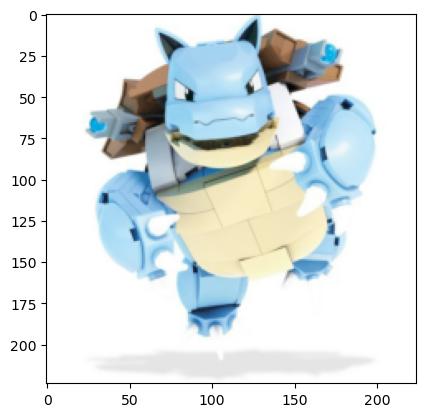

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# get the first batch
images, labels = next(iter(train_loader))

# get the first image
image = images[0]
label = labels[0]

# print the shape, label, dtype of the image
print("Image shape:", image.shape)
print("Image label:", label)
print("Image data type:", image.dtype)

# transform tensor to numpy array
image_np = image.numpy().transpose(1, 2, 0)
# transform [0, 1] to [0, 255]
image_np = np.clip(image_np, 0, 1)

# show image
plt.imshow(image_np)
plt.show()

### Model Construction

In [3]:
class AlexNet(nn.Module):
    def __init__(self, num_classes=1000):
        super(AlexNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=11, stride=4, padding=2)
        self.conv2 = nn.Conv2d(64, 192, kernel_size=5, padding=2)
        self.conv3 = nn.Conv2d(192, 384, kernel_size=3, padding=1)
        self.conv4 = nn.Conv2d(384, 256, kernel_size=3, padding=1)
        self.conv5 = nn.Conv2d(256, 256, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(256 * 6 * 6, 4096)
        self.fc2 = nn.Linear(4096, 4096)
        self.fc3 = nn.Linear(4096, num_classes)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, kernel_size=3, stride=2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, kernel_size=3, stride=2)
        x = F.relu(self.conv3(x))
        x = F.relu(self.conv4(x))
        x = F.relu(self.conv5(x))
        x = F.max_pool2d(x, kernel_size=3, stride=2)
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, 0.5)
        x = F.relu(self.fc2(x))
        x = F.dropout(x, 0.5)
        x = self.fc3(x)
        return x

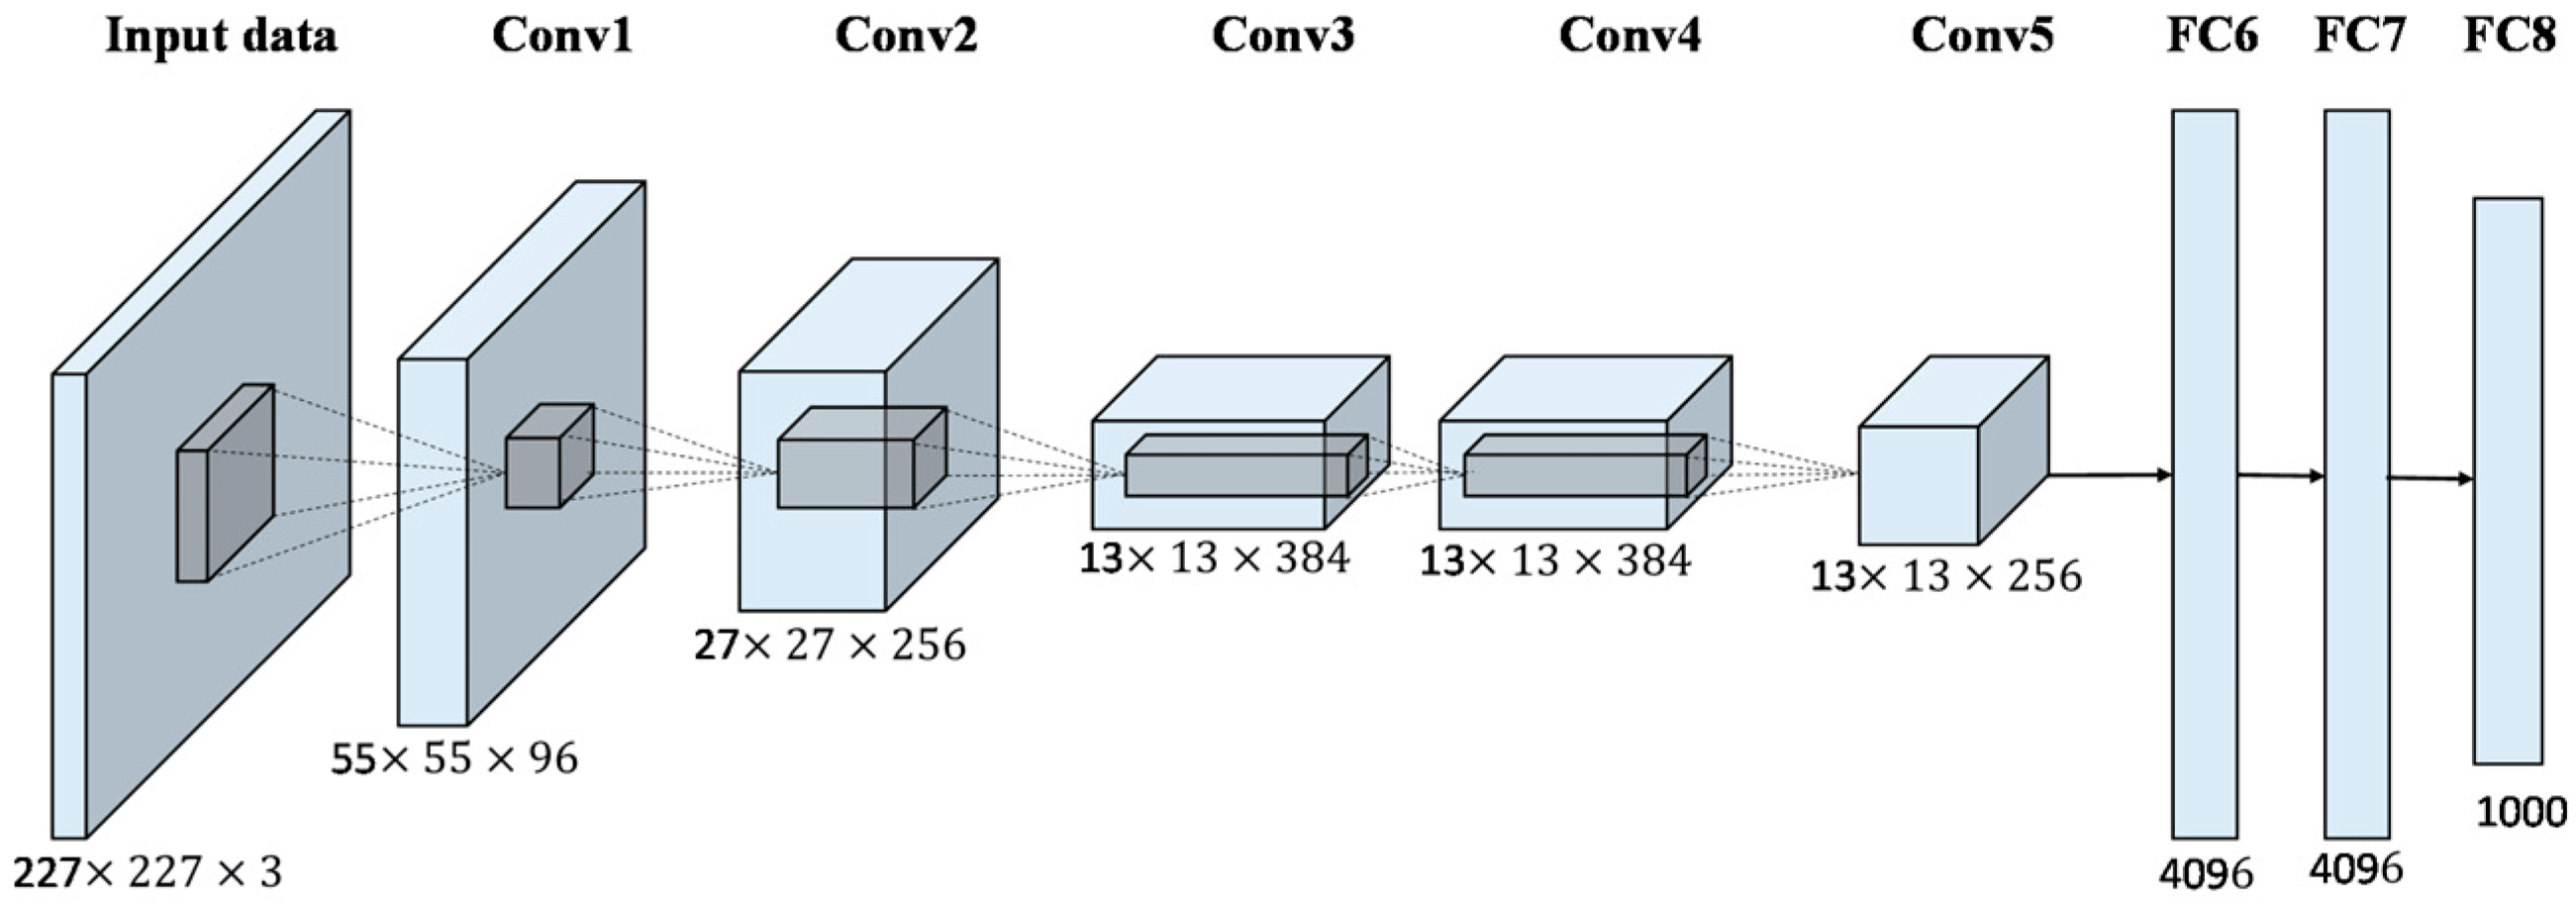

In [4]:
import torch
import torch.nn as nn

#  define 3x3 convolution layer
def conv3x3(in_channels, out_channels, stride=1):
    #  use 3x3 convolution kernel, stride = stride, padding = 1, no bias
    return nn.Conv2d(in_channels, out_channels, 3, stride, 1, bias=False)

#  define 1x1 convolution layer
def conv1x1(in_channels, out_channels, stride=1):
    #  use 1x1 convolution kernel, stride = stride, padding = 0, no bias
    return nn.Conv2d(in_channels, out_channels, 1, stride, 0, bias=False)

# define basic block
class BasicBlock(nn.Module):
    expansion = 1  # chinnel expansion
    def __init__(self, in_channels, out_channels, stride=1, downsample=None):
        super(BasicBlock, self).__init__()
        # first convolution layer
        self.conv1 = conv3x3(in_channels, out_channels, stride)
        self.bn1 = nn.BatchNorm2d(out_channels)  # batch normalization
        self.relu = nn.ReLU(inplace=True)  # activation function
        # second convolution layer
        self.conv2 = conv3x3(out_channels, out_channels)
        self.bn2 = nn.BatchNorm2d(out_channels)
        self.downsample = downsample  # downsample，Reducing the spatial dimensions of the feature map, increasing depth of feature map...
        self.stride = stride

    def forward(self, x):
        identity = x if self.downsample is None else self.downsample(x)

        out = self.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        out += identity # skip connection, if downsample is None then identity = x, else identity = downsample(x)
        return self.relu(out)

# define ResNet18
class ResNet18(nn.Module):
    def __init__(self, num_classes=1000):
        super(ResNet18, self).__init__()
        self.in_channels = 64  # input channel
        # initial convolution layer
        self.conv1 = nn.Conv2d(3, self.in_channels, 7, 2, 3, bias=False)
        self.bn1 = nn.BatchNorm2d(self.in_channels)  # batch normalization
        self.relu = nn.ReLU(inplace=True)  # activation function
        self.maxpool = nn.MaxPool2d(3, 2, 1)  # max pooling

        # 4 residual blocks
        self.layer1 = self.make_layer(BasicBlock, 64, 2)
        self.layer2 = self.make_layer(BasicBlock, 128, 2, stride=2)
        self.layer3 = self.make_layer(BasicBlock, 256, 2, stride=2)
        self.layer4 = self.make_layer(BasicBlock, 512, 2, stride=2)

        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))  # average pooling
        self.fc = nn.Linear(512 * BasicBlock.expansion, num_classes)  # fully connected layer

        # initialize parameters
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
            elif isinstance(m, nn.BatchNorm2d):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)

    def forward(self, x):
        x = self.maxpool(self.relu(self.bn1(self.conv1(x))))
        x = self.layer4(self.layer3(self.layer2(self.layer1(x))))
        x = torch.flatten(self.avgpool(x), 1)
        return self.fc(x)

    # define residual block
    def make_layer(self, block, out_channels, num_blocks, stride=1):
        downsample = None
        if stride != 1 or self.in_channels != out_channels * block.expansion:
            downsample = nn.Sequential(conv1x1(self.in_channels, out_channels * block.expansion, stride),
                                       nn.BatchNorm2d(out_channels * block.expansion))
        layers = [block(self.in_channels, out_channels, stride, downsample)]
        self.in_channels = out_channels * block.expansion
        layers.extend(block(self.in_channels, out_channels) for _ in range(1, num_blocks))
        return nn.Sequential(*layers)


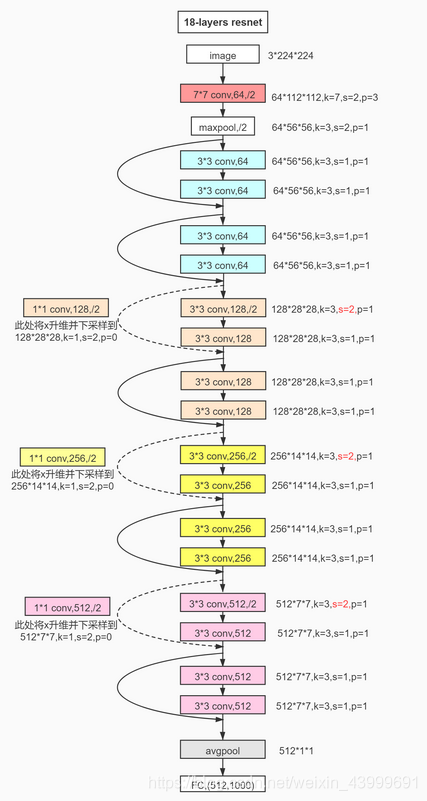

### Train Model & Select Model

In [5]:
def validate(model, val_loader):
    # validate the model, return the accuracy
    correct = 0 # predict correct number
    total = 0   # total number
    with torch.no_grad():
        for data in val_loader:
            images, labels = data
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    return correct / total

alexModel = AlexNet(150)
alexModel.to(device)

# define loss function
criterion = nn.CrossEntropyLoss()
# define optimizer,Adam is a kind of gradient descent algorithm,not sensitive to hyperparameters
optimizer = optim.Adam(alexModel.parameters(), lr=0.001)

num_epochs = 50
correct = 0

# train the model
for epoch in range(num_epochs):
    total_loss = 0.0  # every epoch loss

    # use tqdm to show the progress bar
    progress_bar = tqdm(train_loader,desc='Epoch {:1d}'.format(epoch),leave=False,disable=False)

    for inputs, labels in progress_bar:
        # 
        inputs = inputs.to(device)
        labels = labels.to(device)
        # gradient clear
        optimizer.zero_grad()
        outputs = alexModel(inputs)
        # calculate loss
        loss = criterion(outputs, labels)
        # backpropagation
        loss.backward()
        optimizer.step()  # update parameters

        total_loss += loss.item()

        progress_bar.set_postfix({'training_loss': '{:.3f}'.format(loss.item() / len(inputs))})

    # use validate dataset to validate the model, each 5 epoch
    if (epoch + 1) % 5 == 0:
        acc = validate(alexModel, val_loader)
    #   save the best model
        if(acc > correct):
            correct = acc
            torch.save(alexModel.state_dict(), 'alexModel.ckpt')  # save model

In [6]:
## codes

model = ResNet18(150)
model.to(device)

# define loss function
criterion = nn.CrossEntropyLoss()
# define optimizer,Adam is a kind of gradient descent algorithm,not sensitive to hyperparameters
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 50
correct = 0

# train the model
for epoch in range(num_epochs):
    total_loss = 0.0  # every epoch loss

    # use tqdm to show the progress bar
    progress_bar = tqdm(train_loader,desc='Epoch {:1d}'.format(epoch),leave=False,disable=False)

    for inputs, labels in progress_bar:
        # 
        inputs = inputs.to(device)
        labels = labels.to(device)
        # gradient clear
        optimizer.zero_grad()
        outputs = model(inputs)
        # calculate loss
        loss = criterion(outputs, labels)
        # backpropagation
        loss.backward()
        optimizer.step()  # update parameters

        total_loss += loss.item()

        progress_bar.set_postfix({'training_loss': '{:.3f}'.format(loss.item() / len(inputs))})

    # use validate dataset to validate the model, each 5 epoch
    if (epoch + 1) % 5 == 0:
        acc = validate(model, val_loader)
    #   save the best model
        if(acc > correct):
            correct = acc
            torch.save(model.state_dict(), 'model.ckpt')  # save model


Epoch 0:   0%|          | 0/43 [00:00<?, ?it/s]

---

## Performance

In [7]:
if (os.path.exists('alexModel.ckpt')):
    alexModel.load_state_dict(torch.load('alexModel.ckpt'))
alexModel.eval()  # set model to evaluation mode
correct = 0
total = 0

# test the model
with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = alexModel(images)
        # get the predicted label
        _, predicted = torch.max(outputs.data, dim=1)
        # calculate the accuracy
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the test images: {} %'.format(100 * correct / total))

Accuracy of the network on the test images: 0.4398826979472141 %


In [8]:
## codes

if(os.path.exists('model.ckpt')):
    model.load_state_dict(torch.load('model.ckpt'))
model.eval()  # set model to evaluation mode
correct = 0
total = 0

# test the model
with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        # get the predicted label
        _, predicted = torch.max(outputs.data, dim=1)
        # calculate the accuracy
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the test images: {} %'.format(100 * correct / total))


Accuracy of the network on the test images: 76.39296187683284 %


The results explains:  


**AlexNet:(50 epoch)**  
Accuracy of the network on the test images: **0.4398826979472141 %**  
**ResNet18:(50 epoch)**    
Accuracy of the network on the test images: **76.39296187683284 %**  
**Original Model:(1000 epoch)**  
Test set: Average loss: 384.9555, Accuracy: 322/679 (**47%**)  


## Compared to the original model's data, ResNet18 has shown a **29%** improvement.




#### **The reasons for the good performance of ResNet18:**

- **Residual Learning**: The core innovation of ResNet is its residual learning framework. In traditional deep networks, the problems of gradient vanishing and exploding become more severe as the number of layers increases, limiting the growth of network depth. Residual learning introduces "skip connections," allowing the network to deepen without adding extra parameters, aiding in training deeper models.

- **Preventing Overfitting**: Thanks to the design of residual blocks, ResNet18 can effectively learn features without overly depending on the training dataset, improving the model's generalization ability on unseen data.

- **Network Structure Optimization**: ResNet18 uses batch normalization and ReLU activation functions, which contribute to rapid network convergence and reduce internal covariate shift.

- **Improved Gradient Flow**: Skip connections allow gradients to flow directly through the network, alleviating the gradient vanishing problem in deep networks and enabling more effective learning.

- **Adaptability**: Although relatively shallow compared to other ResNet variants like ResNet50 or ResNet101, ResNet18 can still capture a rich set of features, making it suitable for various image recognition tasks.

- **Computational Efficiency**: Compared to deeper networks, ResNet18 maintains high accuracy while requiring fewer computational resources, making it more practical in scenarios with limited resources.